# (2 of 3) PCA
---
# AMEX Default
# Dimensionality Reduction: PCA, LDA
### (Compared by Classification Algorithms)
---

In [1]:
import sys
sys.version

'3.8.8 (default, Apr 13 2021, 19:58:26) \n[GCC 7.3.0]'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_parquet('./dataset/train_data.parquet')

In [4]:
df['S_2'] = pd.to_datetime(df['S_2'], format='%Y/%m/%d')

In [5]:
category_cols = ['B_30','B_38','D_114','D_116','D_117','D_120','D_126','D_63','D_64','D_66','D_68']

for col in category_cols:
    df[col] = df[col].astype('category')

In [6]:
my_dictionary = {'CO':0,'CR':1,'CL':2,'XL':3,'XZ':4,'XM':5}
df['D_63'] = df['D_63'].map(my_dictionary)

In [7]:
my_dictionary = {'O':0,'R':1,'U':2,'-1':3}
df['D_64'] = df['D_64'].map(my_dictionary)

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)
df_missing_val = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [9]:
df.drop(
    columns=df_missing_val.loc[
        df_missing_val.percent_missing > 50
    ].index, inplace=True, errors='ignore'
)

In [10]:
df.dropna(inplace=True)

### Train/Test split with the 80:20 ratio

In [11]:
X = df.drop(['target','customer_ID','S_2'],axis=1)
y = df['target']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1041295, 158)
(260324, 158)
(1041295,)
(260324,)


#### This evaluation function will keep the evaluation values to use in the Performance Graph Comparison later.

In [15]:
df_model_compare = pd.read_csv('./eval_results/eval_results.csv',index_col=0)

In [16]:
acc = df_model_compare.loc['Accuracy'].to_dict()
f1 = df_model_compare.loc['F1 Score'].to_dict()
prec = df_model_compare.loc['Precision'].to_dict()
recl = df_model_compare.loc['Recall'].to_dict()

def my_eval(model,y_test,predicted):
    
    print(model,'Results')
    print('Accuracy: ', accuracy_score(y_test, predicted))
    print('F1 Score: ', f1_score(y_test, predicted))
    print('Precision: ', precision_score(y_test, predicted))
    print('Recall: ', recall_score(y_test, predicted))
    
    acc[model] = accuracy_score(y_test, predicted)
    f1[model] = f1_score(y_test, predicted)
    prec[model] = precision_score(y_test, predicted)
    recl[model] = recall_score(y_test, predicted)
    
    global df_model_compare
    df_model_compare = pd.DataFrame.from_dict(
        [acc,f1,prec,recl]
    ).rename(
        index={0:'Accuracy',1:'F1 Score',2:'Precision',3:'Recall'}
    )
    display(df_model_compare)

---
# 1. Principal Component Analysis (PCA)
---

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=30)

In [19]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [20]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(1041295, 30)
(260324, 30)


In [21]:
del X_train
del X_test

### Show the influence of the old features on the new components created with the PCA
Index 0 is pc1 (Principal Component 1), and so on.

In [22]:
df_comp = pd.DataFrame(pca.components_, columns=X.columns)
df_comp.T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
P_2,-0.001826,-0.000882,-0.001075,0.026438,0.011903,0.018667,-0.089133,0.015020,0.020088,-0.000787,...,0.010492,-0.014448,-0.023097,-0.012751,0.000684,0.044107,0.030591,-0.055209,-0.004102,-0.007005
D_39,0.000398,0.000390,0.006324,-0.001653,-0.002912,0.001897,0.018225,0.006203,-0.016696,0.002462,...,0.045026,-0.031827,-0.012251,0.037003,0.008583,0.005792,-0.100678,-0.048142,0.008197,0.062135
B_1,0.000242,0.000002,-0.000247,-0.011214,-0.009061,-0.012874,0.057602,-0.008403,-0.047180,0.000561,...,-0.015738,-0.049406,-0.038156,0.072282,-0.027692,0.035081,-0.063388,0.011752,-0.003175,0.015521
B_2,-0.001144,-0.000443,-0.004493,0.037493,0.026383,0.039867,-0.162160,0.025142,0.119814,0.008601,...,0.066779,0.124034,0.099524,-0.107182,-0.002282,0.003520,0.155483,0.123599,-0.154783,0.133726
R_1,0.002747,0.000375,0.001410,-0.011509,-0.006645,-0.009426,0.053151,0.017978,-0.015394,0.037966,...,0.086264,-0.005042,0.012669,0.040390,0.003500,0.008743,-0.022471,0.033827,0.003780,0.046280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D_140,0.000116,-0.000045,-0.000110,-0.003449,-0.001323,-0.002635,0.010289,-0.002516,-0.001468,-0.000932,...,0.004949,0.005474,-0.004471,0.003305,0.001850,-0.004676,0.000979,0.006230,0.004875,-0.001791
D_141,0.000408,-0.000047,-0.000475,-0.012291,-0.005479,-0.011791,0.044201,-0.015217,-0.000784,-0.009946,...,0.051783,-0.024656,-0.048836,0.002760,0.004759,-0.008336,0.029134,0.002662,0.004087,0.000337
D_143,0.000447,-0.000096,-0.000540,-0.013768,-0.006047,-0.013042,0.048770,-0.017040,-0.000438,-0.010873,...,0.056348,-0.026661,-0.052864,0.003267,0.005488,-0.009745,0.031280,0.003166,0.004980,0.000062
D_144,-0.000026,0.000110,-0.000020,-0.000677,-0.000983,-0.001851,0.006682,-0.002643,0.000183,-0.003180,...,0.018893,-0.021535,-0.019766,-0.001228,-0.000437,0.001573,0.016281,-0.003602,-0.003306,0.003438


<AxesSubplot:>

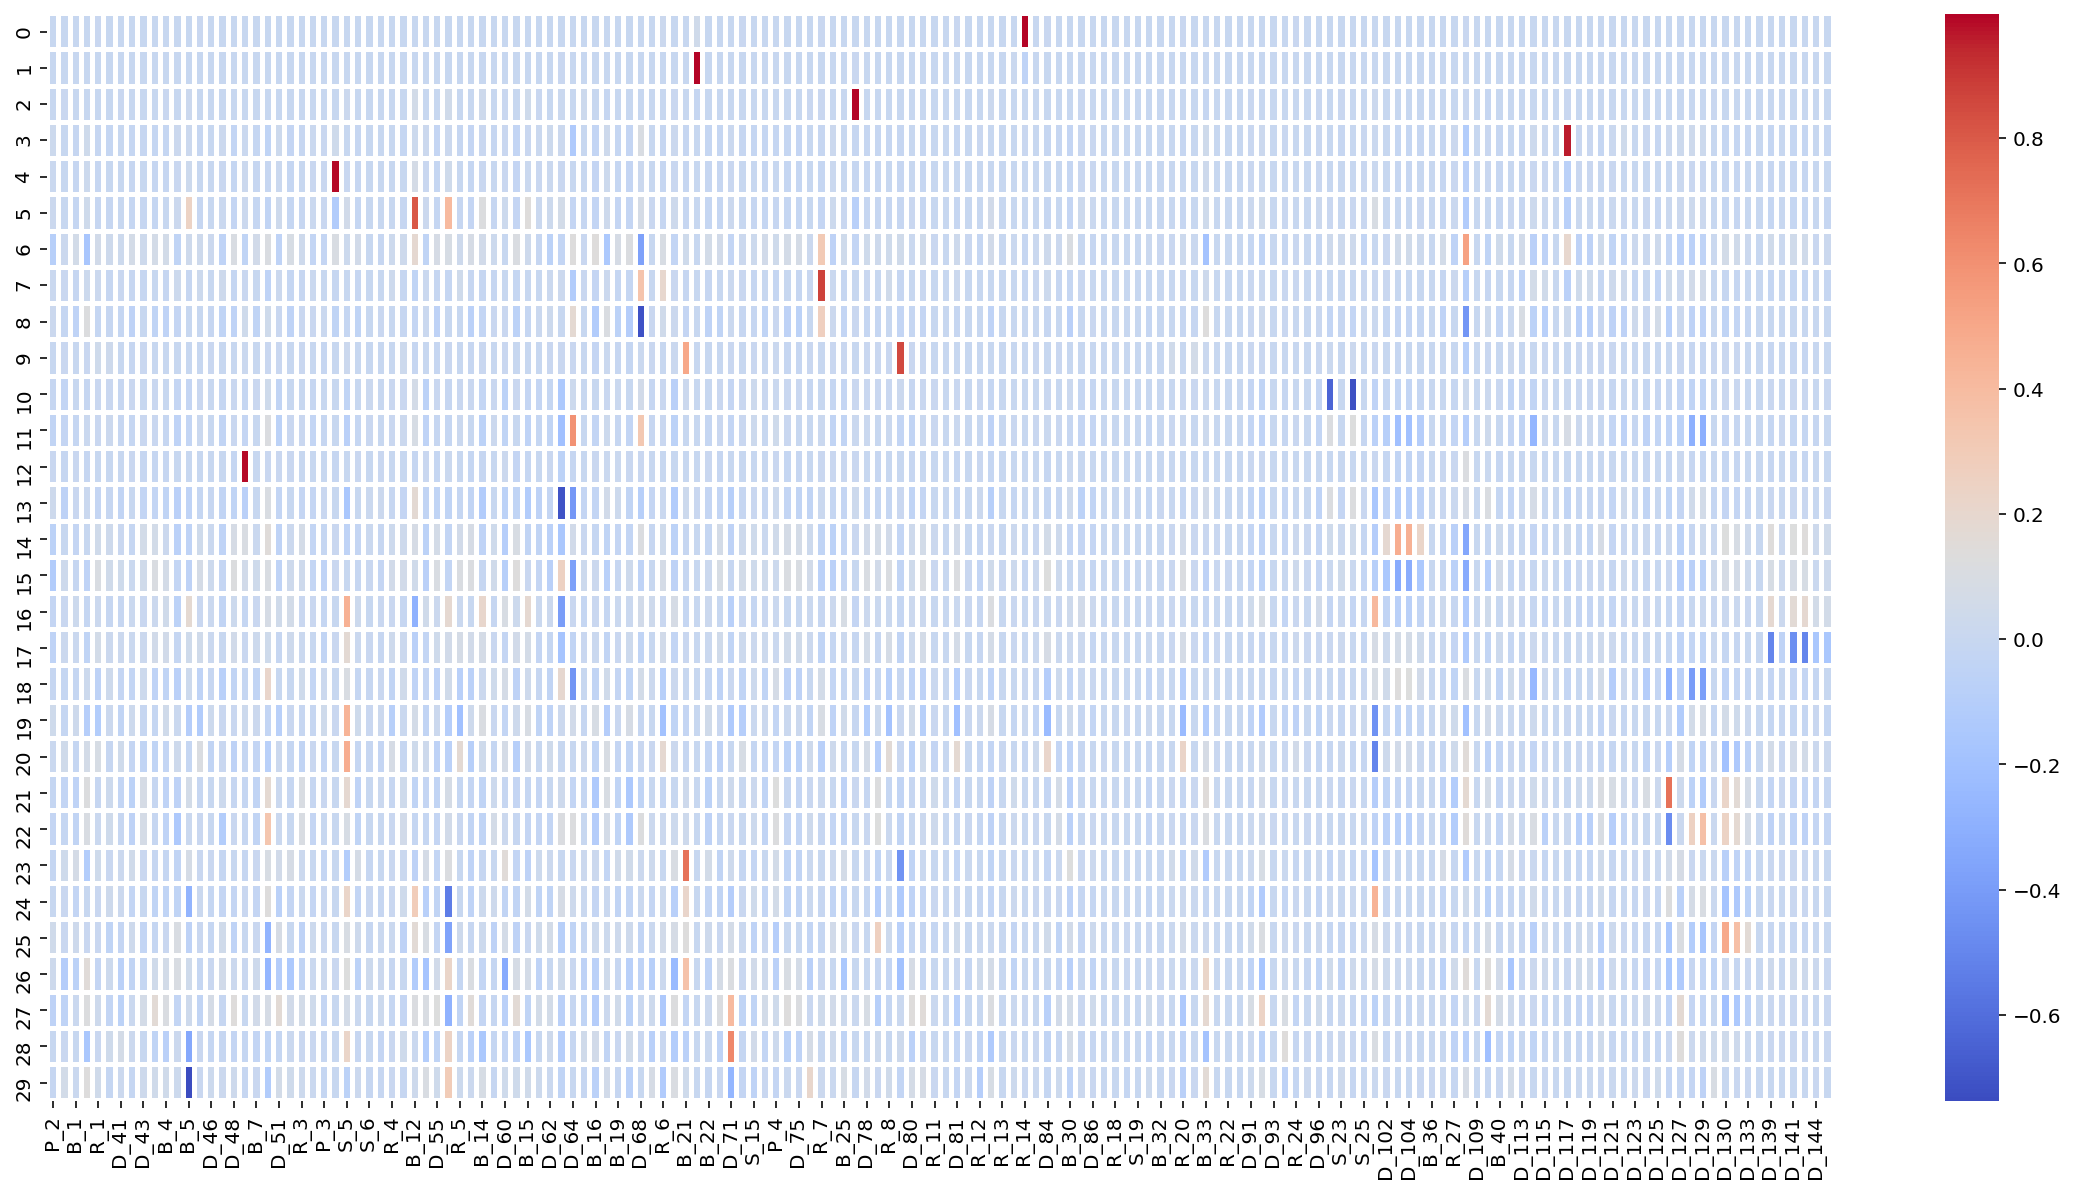

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df_comp, annot=False, cmap='coolwarm', linecolor='white', linewidths=2)

In [24]:
pca.explained_variance_

array([55.17363291, 33.30206562, 10.86834123,  5.73842943,  3.87446421,
        3.28203441,  2.67261874,  2.28867219,  1.98913717,  1.04358856,
        0.90940326,  0.75211178,  0.73675324,  0.68801226,  0.59372805,
        0.49043032,  0.41190754,  0.38911074,  0.37352142,  0.33131912,
        0.29437656,  0.25945799,  0.25614846,  0.22221429,  0.21836937,
        0.21347195,  0.21012252,  0.19381524,  0.18333811,  0.17319694])

pc1 มี var = 55.17363291 (ยิ่งเลขเยอะยิ่งมีความสำคัญมาก)

In [25]:
pca.explained_variance_ratio_.cumsum()

array([0.41642237, 0.66776933, 0.74979801, 0.79310874, 0.82235122,
       0.84712233, 0.86729389, 0.88456762, 0.89958061, 0.90745708,
       0.9143208 , 0.91999735, 0.92555799, 0.93075075, 0.93523191,
       0.93893342, 0.94204229, 0.9449791 , 0.94779825, 0.95029888,
       0.95252068, 0.95447894, 0.95641221, 0.95808937, 0.95973751,
       0.96134869, 0.96293459, 0.96439741, 0.96578115, 0.96708835])

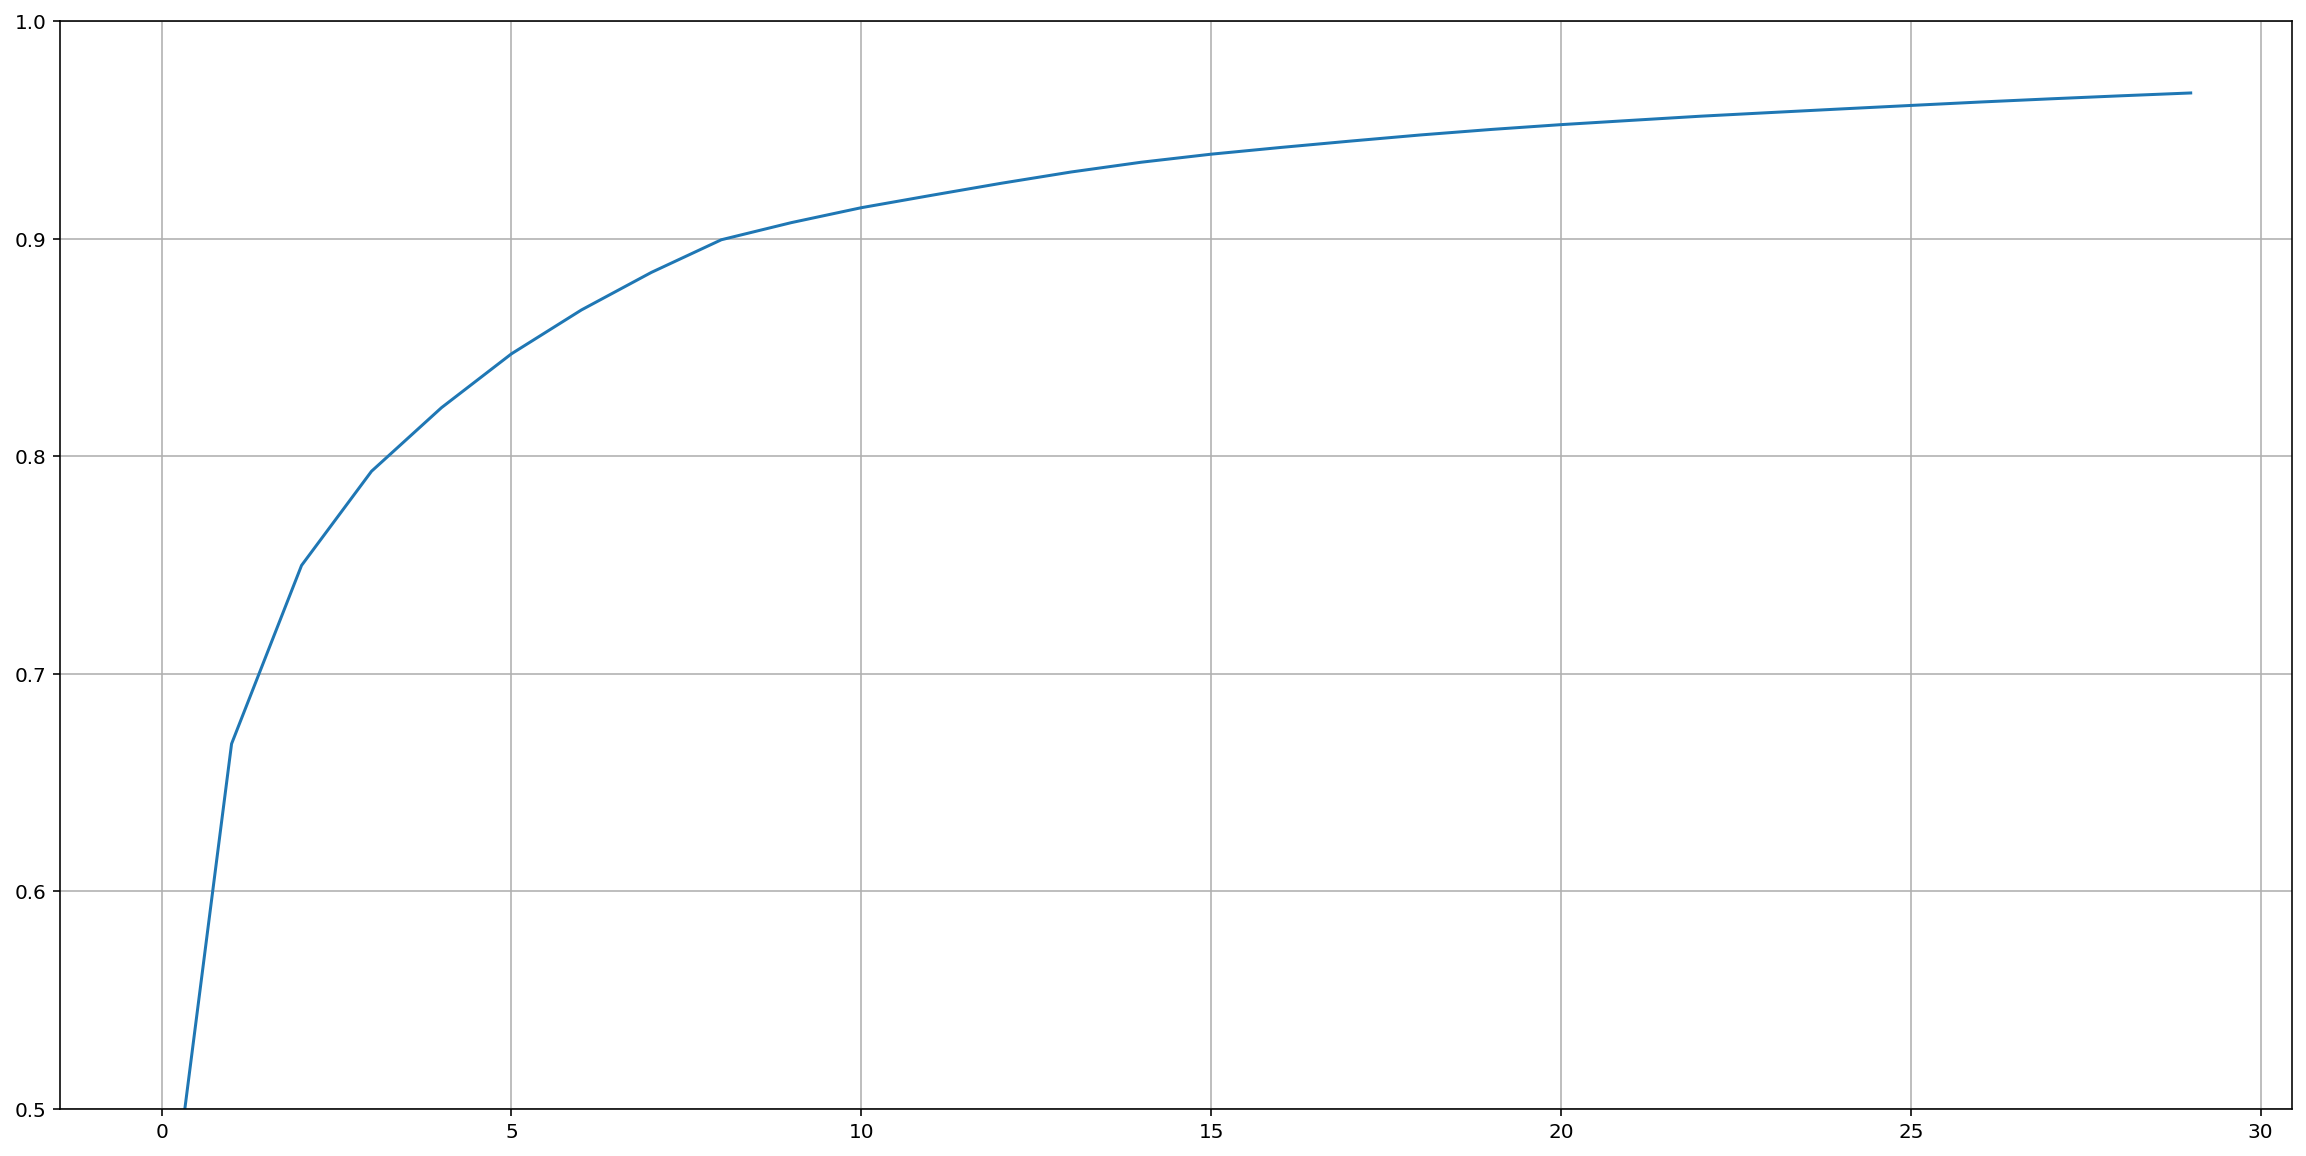

In [26]:
plt.figure(figsize=(20,10))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.ylim(0.5,1)
plt.grid()

In [27]:
print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5)  )

Components =  30 ;
Total explained variance =  0.96709


There're variances contained in these components up to 96.7%.  
Hence, 30 components can capture enough information.

## 1.1 Logistic Regression with PCA

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [ ]:
from sklearn.linear_model import LogisticRegression

logit_pca = LogisticRegression(max_iter=1000)
logit_pca.fit(X_train_pca, y_train)

Running time is about 20 seconds.

In [29]:
# Save Model
#joblib.dump(logit_pca, './models/Logit_PCA.pkl')

# Load Model
logit_pca = joblib.load('./models/Logit_PCA.pkl')

In [30]:
logistic_predicted_pca = logit_pca.predict(X_test_pca)

In [31]:
confusion_matrix(y_test, logistic_predicted_pca)

array([[188437,  12897],
       [ 18231,  40759]])

[ TN FP ]  
[ FN TP ]

TP (Predict as default; the truth is default)  
TN (Predict as not default; the truth is not default)  
FP (Predict as default; the truth is not default)  
FN (Predict as not default; the truth is default)

In [32]:
my_eval('Logit_PCA',y_test,logistic_predicted_pca)

Logit_PCA Results
Accuracy:  0.8804259307632027
F1 Score:  0.7236652877154981
Precision:  0.7596354554942597
Recall:  0.6909476182403798


,Logit,NB,DT,RF,Logit_PCA
Accuracy,0.890152,0.860389,0.862033,0.908353,0.880426
F1 Score,0.750402,0.706927,0.695627,0.795428,0.723665
Precision,0.773436,0.674146,0.695509,0.804785,0.759635
Recall,0.728700,0.743058,0.695745,0.786286,0.690948


## 1.2 Naive Bayes with PCA

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_pca = GaussianNB()
nb_pca.fit(X_train_pca, y_train)

Running time is about 1 second.

In [33]:
# Save Model
#joblib.dump(nb_pca, './models/NB_PCA.pkl')

# Load Model
nb_pca = joblib.load('./models/NB_PCA.pkl')

In [34]:
nb_predicted_pca = nb_pca.predict(X_test_pca)

In [35]:
confusion_matrix(y_test, nb_predicted_pca)

array([[191633,   9701],
       [ 32507,  26483]])

In [36]:
my_eval('NB_PCA',y_test,nb_predicted_pca)

NB_PCA Results
Accuracy:  0.837863585378221
F1 Score:  0.5565175363019312
Precision:  0.7318980764978996
Recall:  0.4489404983895576


,Logit,NB,DT,RF,Logit_PCA,NB_PCA
Accuracy,0.890152,0.860389,0.862033,0.908353,0.880426,0.837864
F1 Score,0.750402,0.706927,0.695627,0.795428,0.723665,0.556518
Precision,0.773436,0.674146,0.695509,0.804785,0.759635,0.731898
Recall,0.728700,0.743058,0.695745,0.786286,0.690948,0.448940


## 1.3 Decision Tree with PCA

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree_pca = DecisionTreeClassifier()
dtree_pca.fit(X_train_pca, y_train)

Running time is about 2 minutes.

In [37]:
# Save Model
#joblib.dump(dtree_pca, './models/DT_PCA.pkl')

# Load Model
dtree_pca = joblib.load('./models/DT_PCA.pkl')

In [38]:
dtree_predicted_pca = dtree_pca.predict(X_test_pca)

In [39]:
confusion_matrix(y_test, dtree_predicted_pca)

array([[182822,  18512],
       [ 18105,  40885]])

In [40]:
my_eval('DT_PCA',y_test,dtree_predicted_pca)

DT_PCA Results
Accuracy:  0.8593406677832239
F1 Score:  0.6907008370851528
Precision:  0.6883344276646969
Recall:  0.6930835734870316


,Logit,NB,DT,RF,Logit_PCA,NB_PCA,DT_PCA
Accuracy,0.890152,0.860389,0.862033,0.908353,0.880426,0.837864,0.859341
F1 Score,0.750402,0.706927,0.695627,0.795428,0.723665,0.556518,0.690701
Precision,0.773436,0.674146,0.695509,0.804785,0.759635,0.731898,0.688334
Recall,0.728700,0.743058,0.695745,0.786286,0.690948,0.448940,0.693084


## 1.4 Random Forest with PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_pca = RandomForestClassifier()
rf_pca.fit(X_train_pca, y_train)

Running time is about 25 minutes.

In [41]:
# Save Model
#joblib.dump(rf_pca, './models/RF_PCA.pkl')

# Load Model
rf_pca = joblib.load('./models/RF_PCA.pkl')

In [42]:
rf_predicted_pca = rf_pca.predict(X_test_pca)

In [43]:
confusion_matrix(y_test, rf_predicted_pca)

array([[191239,  10095],
       [ 12868,  46122]])

In [44]:
my_eval('RF_PCA',y_test,rf_predicted_pca)

RF_PCA Results
Accuracy:  0.9117906915996988
F1 Score:  0.800680514204866
Precision:  0.820427984417525
Recall:  0.7818613324292253


,Logit,NB,DT,RF,Logit_PCA,NB_PCA,DT_PCA,RF_PCA
Accuracy,0.890152,0.860389,0.862033,0.908353,0.880426,0.837864,0.859341,0.911791
F1 Score,0.750402,0.706927,0.695627,0.795428,0.723665,0.556518,0.690701,0.800681
Precision,0.773436,0.674146,0.695509,0.804785,0.759635,0.731898,0.688334,0.820428
Recall,0.728700,0.743058,0.695745,0.786286,0.690948,0.448940,0.693084,0.781861


---
# 2. Performance Graph Comparison
---

In [45]:
df_model_compare.to_csv('./eval_results/eval_results_with_PCA.csv')

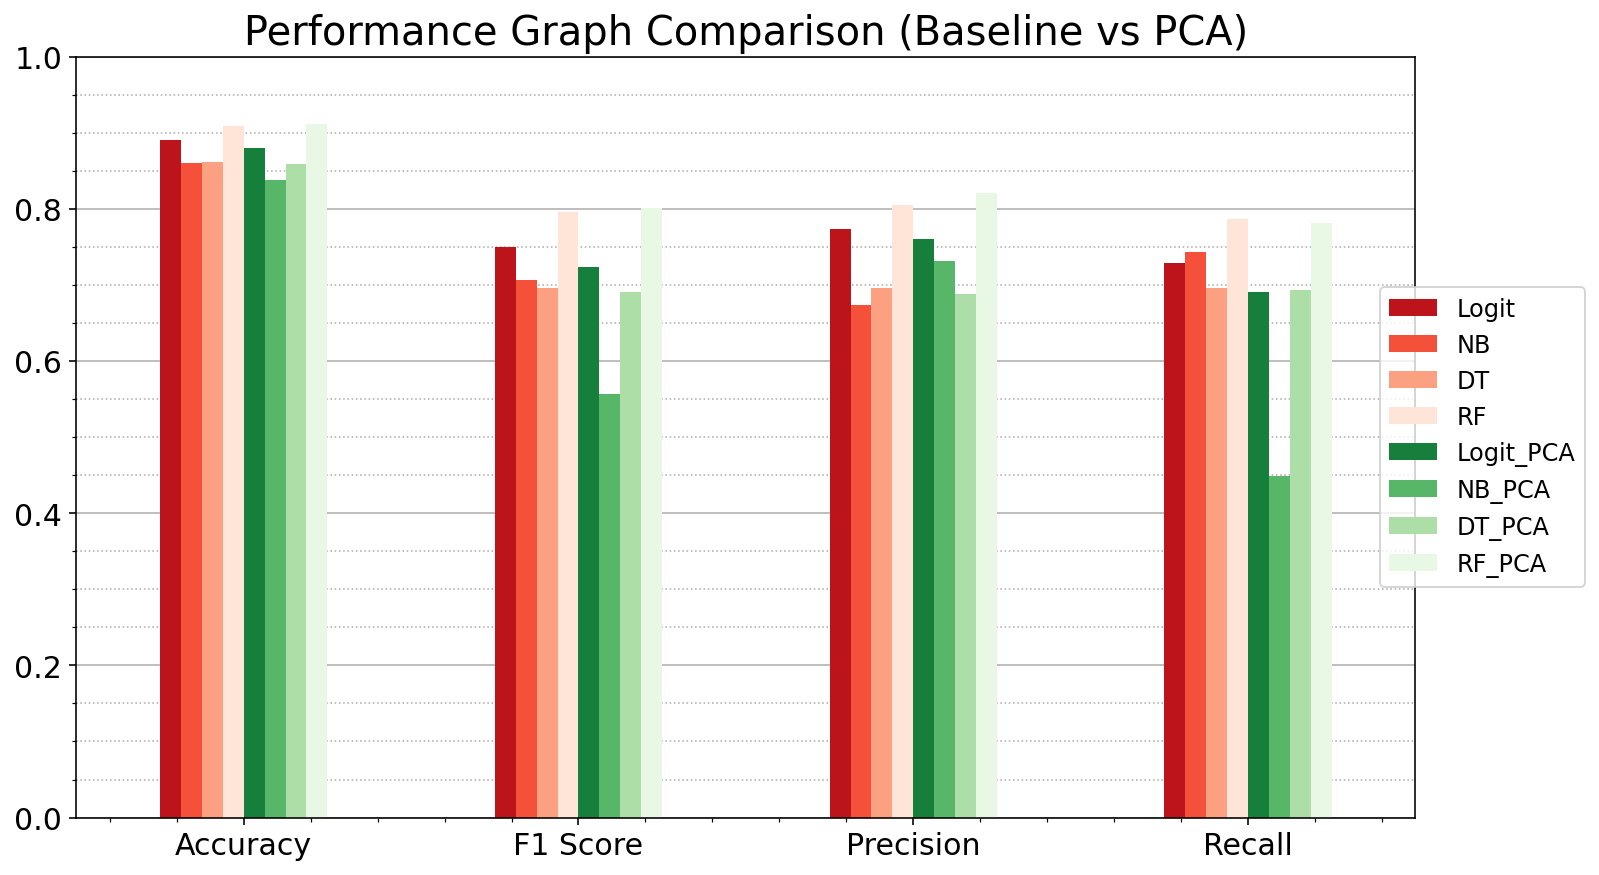

In [46]:
cmap1 = plt.cm.Reds
cmap2 = plt.cm.Greens
colors = [*cmap1(np.linspace(.8, .1, 4)),
          *cmap2(np.linspace(.8, .1, 4)),]

ax = df_model_compare.plot(
    kind='bar', color=colors, rot=0,
    ylim=(0,1), figsize = (12,7), fontsize=15
)
ax.set_axisbelow(True)
ax.grid(linestyle='-', axis='y')
ax.legend(fontsize=12, loc='center', bbox_to_anchor=(1.05,0.5))

plt.minorticks_on()
plt.grid(which='minor', axis='y',ls=':')
plt.title('Performance Graph Comparison (Baseline vs PCA)', fontsize=20)
plt.savefig('./img/graph_PCA')
plt.show()

After we performed the PCA, the performance didn't reduce much. Except for the Naive Bayes that F1 and Recall scores dropped so much.

In [47]:
columns = ['Logit','NB','DT','RF']
rows = ['Baseline','PCA (n=30)']
values = [[5,0.08,20,60],[0.33,0.02,2,25]]

df_running_time = pd.DataFrame(values,rows,columns)

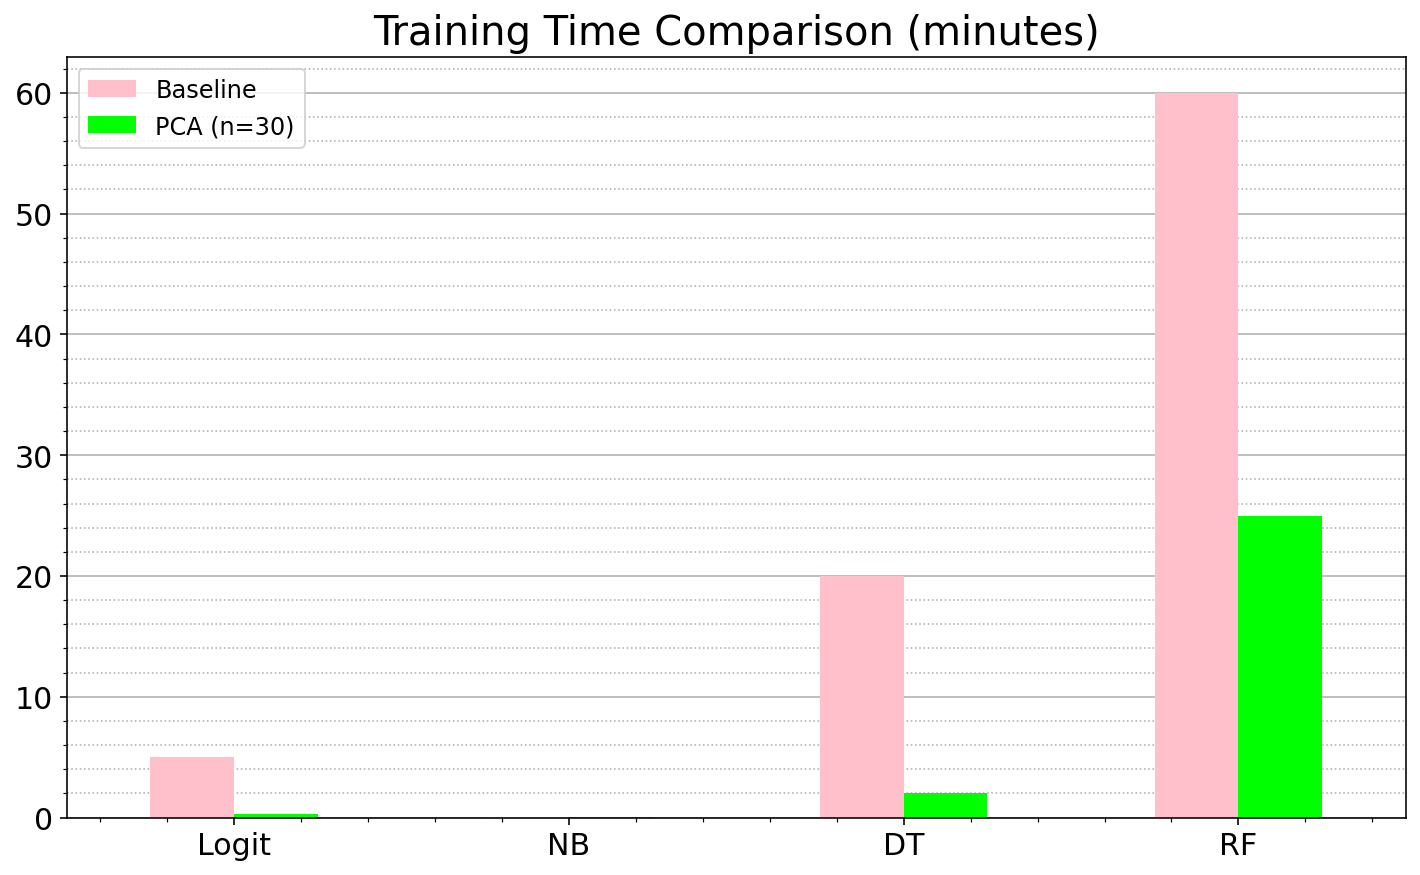

In [48]:
ax = df_running_time.T.plot(
    kind='bar', color=['pink','lime'], rot=0,
    figsize = (12,7), fontsize=15
)
ax.set_axisbelow(True)
ax.grid(linestyle='-', axis='y')
ax.legend(fontsize=12)

plt.minorticks_on()
plt.grid(which='minor', axis='y',ls=':')
plt.title('Training Time Comparison (minutes)', fontsize=20)
plt.savefig('./img/running_time_PCA')
plt.show()

Running on Intel Core i5-8250U 1.8GHz 4 cores 8 threads

---
# Kindly continue on the next notebook: (3 of 3) LDA